In [1]:
from mu2e import mu2e_ext_path
from mu2e.dataframeprod import g4root_to_df
from root_pandas import read_root
import pandas as pd
from mu2e.mu2eplots import mu2e_plot3d_ptrap
from mu2e.mu2eplots import mu2e_plot3d_ptrap_traj
from mu2e.mu2eplots import mu2e_plot3d_ptrap_anim
import mu2e.mu2eplots as mplt
import six.moves.cPickle as pkl
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
mu2e_data_path = '/Volumes/DataDump/Mu2E/'
from skhep.visual import MplPlotter as splt
from matplotlib.colors import LogNorm

Welcome to JupyROOT 6.10/04


/usr/local/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning:

The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.

/usr/local/Cellar/root/6.10.04/lib/root/ROOT.py:318: UserWarning:

IPython.utils.traitlets has moved to a top-level traitlets package.



<IPython.core.display.Javascript object>

In [2]:
# Get pions, make a subset df of matching pions and muons

df_ntpart, _, _ = g4root_to_df(mu2e_data_path+'pion-st-Mau12/run4/nts.bpollack.pions_Mau12_stage1_vd.v650p.combined',
do_basic_modifications=True, trees=['part'])
df_ntpart.set_index(['run', 'subrun', 'evt'], inplace=True)

# df_mu_and_pi = df_ntpart.loc[df_ntpart.query('pdg==-211').index]
# df_mu_and_pi = df_mu_and_pi.loc[df_mu_and_pi.query('pdg==13').index]

In [3]:
df_ntpart.query('tstop>600')

trk  pdg       time  gtime           x           y  \
run subrun evt                                                         
1   227    48800   10   13  60.107563    0.0  -78.301025  557.803711   
    455    57324   22   13  75.137978    0.0 -565.647461  -77.146667   
    717    88447   15   13  84.606682    0.0  -27.139404  300.064178   
    821    14394   10   13  99.199661    0.0 -499.848633  430.496704   

                             z         px          py         pz  \
run subrun evt                                                     
1   227    48800  11796.577148 -67.076370   38.204205  -0.361283   
    455    57324  11360.633789  -3.975028 -114.747955 -15.141302   
    717    88447  11722.920898 -52.086487   87.404129  -0.097280   
    821    14394  11789.155273 -73.577766  -52.577679  -0.345588   

                      ...        parent_px   parent_py  parent_pz    parent_p  \
run subrun evt        ...                                                       
1   227    48800      ...        94.821983   22.869198  34.161285  103.349899   
    455    57324      ...       -26.061977  102.363777  53.747532  118.517372   
    717    88447      ...        63.955948   94.145065  -1.857825  113.829292   
    821    14394      ...        75.027527   80.256050 -20.828138  111.821175   

                  parent_pxstop  parent_pystop  parent_pzstop  parent_pstop  \
run subrun evt                                                                
1   227    48800     -66.776299      45.569565     -33.413559     87.476425   
    455    57324       7.587883    -102.920578     -10.649387    103.747917   
    717    88447     -56.168716      70.363960      -8.988070     90.480919   
    821    14394     -75.458313     -36.133423     -18.708908     85.729836   

                  parent_code  parent_lastke  
run subrun evt                                
1   227    48800           14      25.147652  
    455    57324           14      34.336319  
    717    88447           14      26.762730  
    821    14394           14      24.226780  

[4 rows x 42 columns]

In [4]:
store_xray = pd.HDFStore(mu2e_data_path+'G4ParticleSim/low_e_ele_0T_v580.h5')
df_xray = store_xray.df_ntpart
store_xray.close()

In [5]:
mu2e_plot3d_ptrap(df_ntpart.query('tstop>600'),
                  'zstop','xstop','ystop', x_range=[3700,17500], y_range = [-1000,1000], z_range=[-1000,1000], save_name=None,
                   df_xray=df_xray, color='pstop', title='Muon position at event termination')

binning...
binned


In [6]:
df_ntpart.query('pdg==-211').shape

(39500652, 42)

In [10]:
df_ntpart.query('pdg==13 and tstop>699').shape

(870, 42)

In [10]:
df_pions = df_ntpart.query('pdg==-211')

# Observations

40m Pions Generated, 52-80 MeV mom

    1) Low Z region: Around the OPA.
        a) Primary Ring at Z=~5000
        b) Secondary Ring at Z=~5660
        c) Tertiary Ring? at Z=~6300
    2) Tracker section:
        a) Primary Group at 9200<Z<11000
        b) Secondary Group at Z=~11700
    3) Calo section:
        a) Single group at Z=~13000

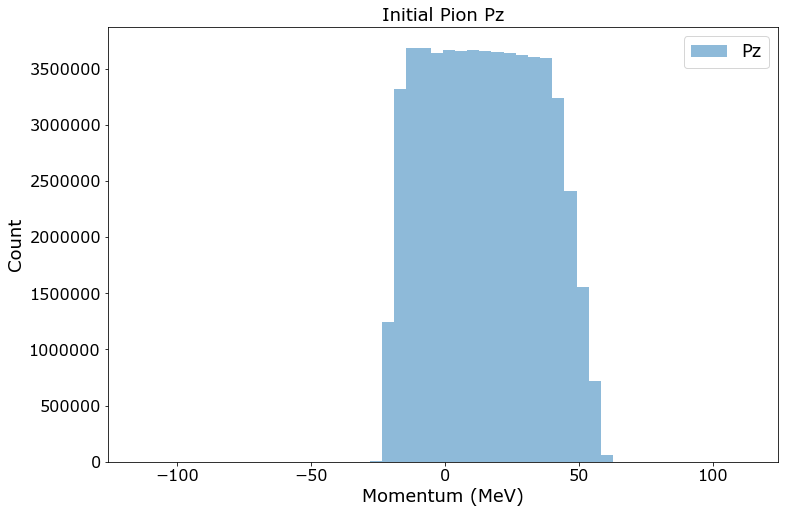

In [7]:
_ = splt.hist(df_ntpart.parent_pz.values, bins=50, label='Pz')
plt.legend()
plt.title('Initial Pion Pz')
plt.xlabel('Momentum (MeV)')
plt.ylabel('Count')


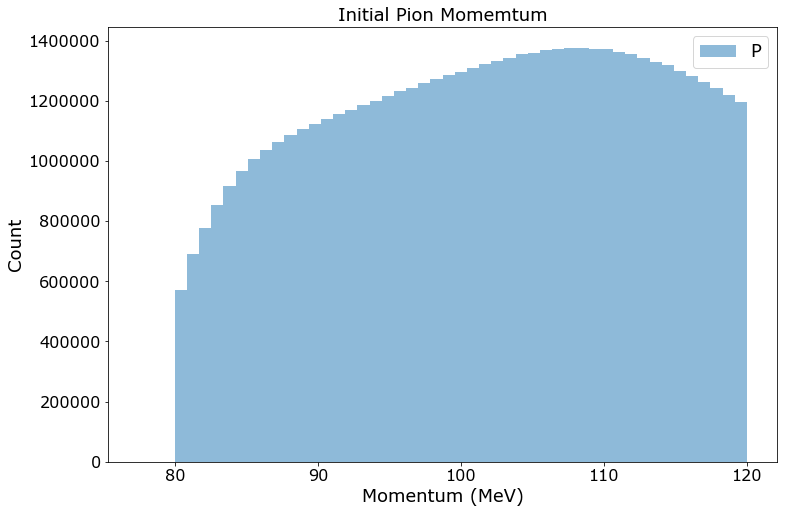

In [6]:
_ = splt.hist(df_ntpart.parent_p.values, bins=50, label='P')
plt.legend()
plt.title('Initial Pion Momemtum')
plt.xlabel('Momentum (MeV)')
plt.ylabel('Count')

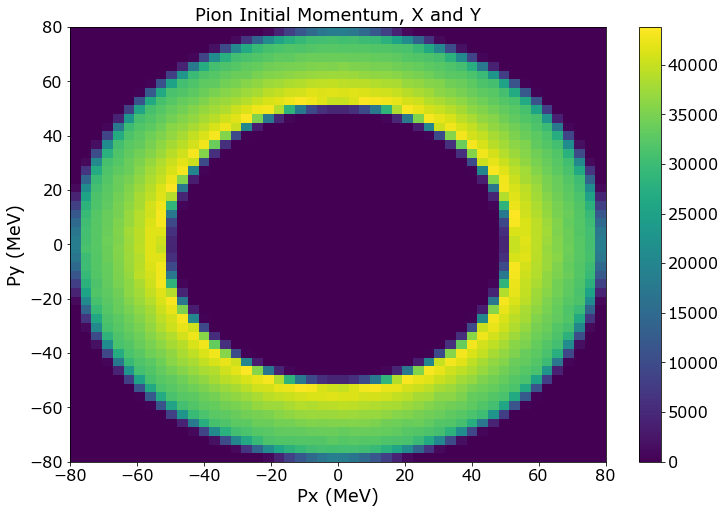

In [16]:
plt.hist2d(df_pions.px.values, df_pions.py.values, bins=50)
plt.xlabel('Px (MeV)')
plt.ylabel('Py (MeV)')
plt.title('Pion Initial Momentum, X and Y')
plt.colorbar()

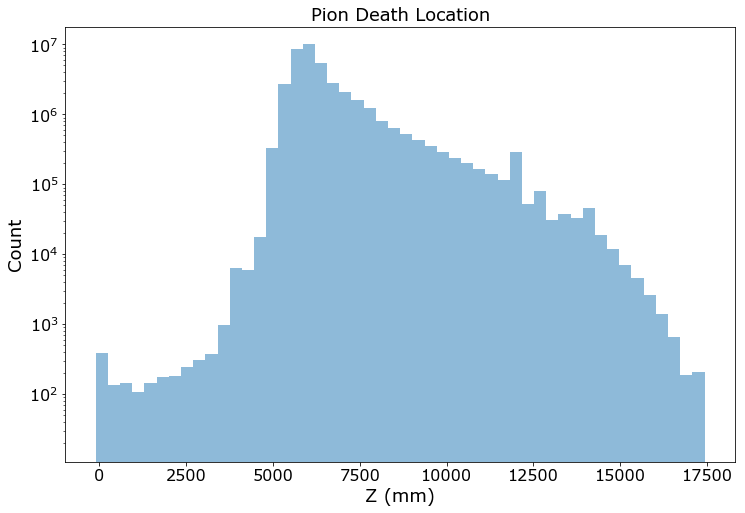

In [23]:
_ = splt.hist(df_pions.zstop.values, bins=50, log=True)
plt.title('Pion Death Location')
plt.xlabel('Z (mm)')
plt.ylabel('Count')

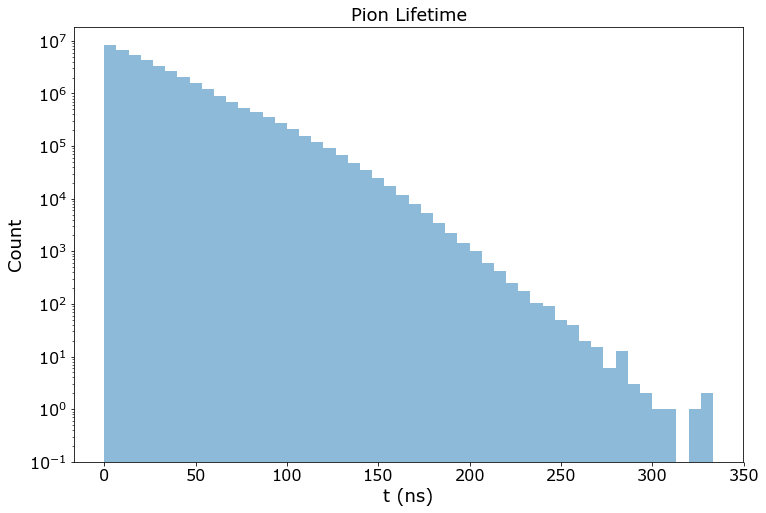

In [14]:
_ = splt.hist(df_pions.tstop.values, bins=50, log=True)
plt.title('Pion Lifetime')
plt.xlabel('t (ns)')
plt.ylabel('Count')

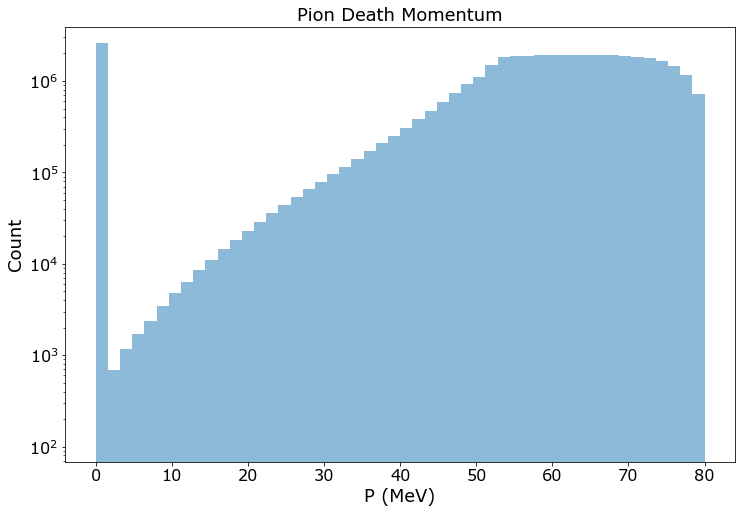

In [25]:
_ = splt.hist(df_pions.pstop.values, bins=50, log=True)
plt.title('Pion Death Momentum')
plt.xlabel('P (MeV)')
plt.ylabel('Count')

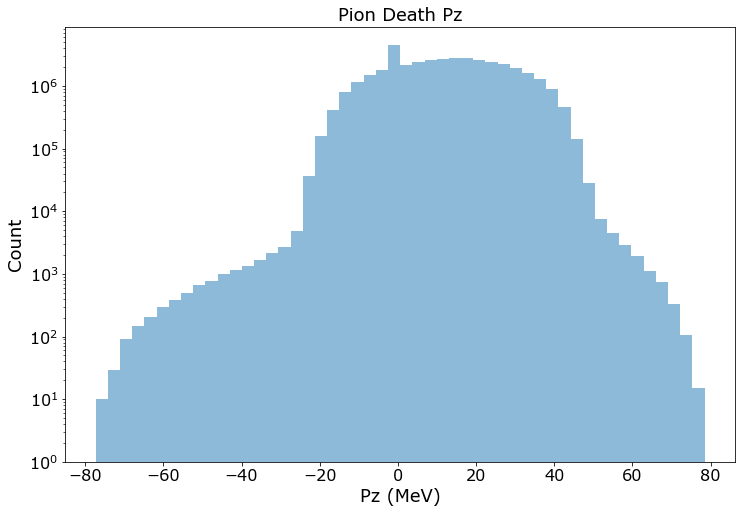

In [13]:
_ = splt.hist(df_pions.pzstop.values, bins=50, log=True)
plt.title('Pion Death Pz')
plt.xlabel('Pz (MeV)')
plt.ylabel('Count')

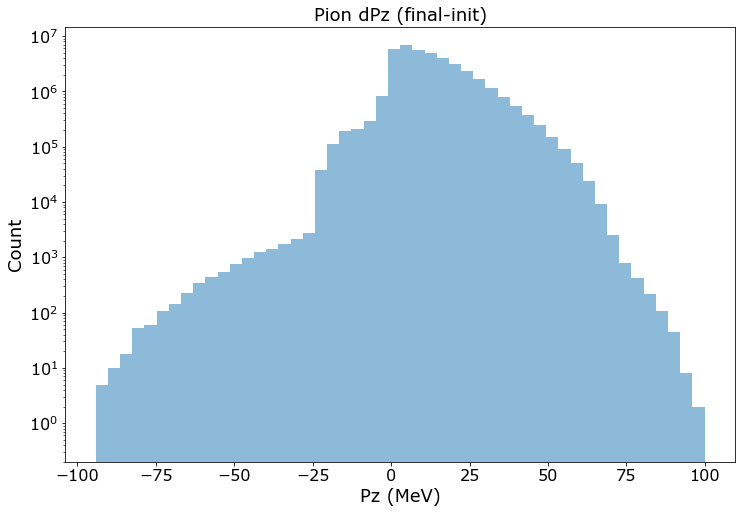

In [11]:
_ = splt.hist(df_pions.pzstop.values-df_pions.pz.values, bins=50, log=True)
plt.title('Pion dPz (final-init)')
plt.xlabel('Pz (MeV)')
plt.ylabel('Count')

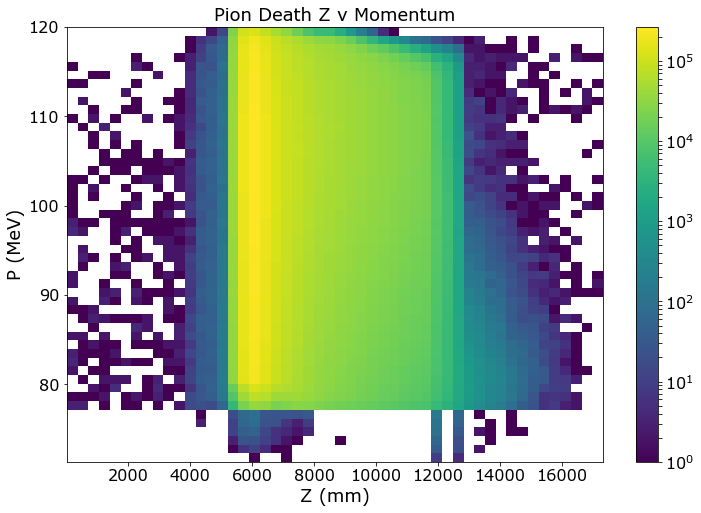

In [9]:
_ = plt.hist2d(df_ntpart.z.values,df_ntpart.parent_pstop.values, bins=50, norm=LogNorm())
plt.title('Pion Death Z v Momentum')
plt.xlabel('Z (mm)')
plt.ylabel('P (MeV)')
plt.colorbar()

In [4]:
df_mu = df_ntpart.query('pdg==13')

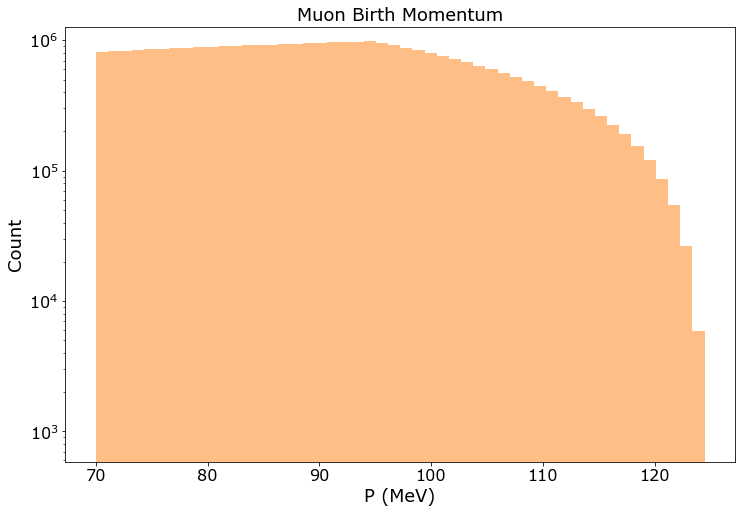

In [15]:
_ = splt.hist(df_ntpart.p.values, bins=50, log=True, color='C1')
plt.title('Muon Birth Momentum')
plt.xlabel('P (MeV)')
plt.ylabel('Count')

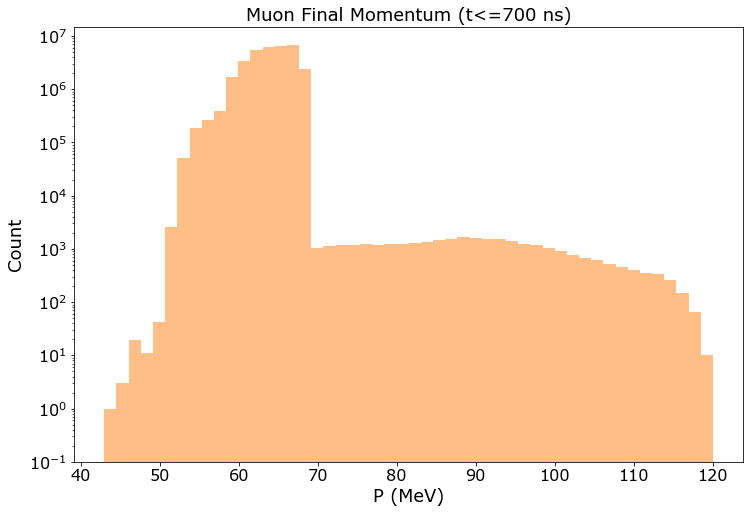

In [16]:
_ = splt.hist(df_ntpart.pstop.values, bins=50, log=True, color='C1')
plt.title('Muon Final Momentum (t<=700 ns)')
plt.xlabel('P (MeV)')
plt.ylabel('Count')

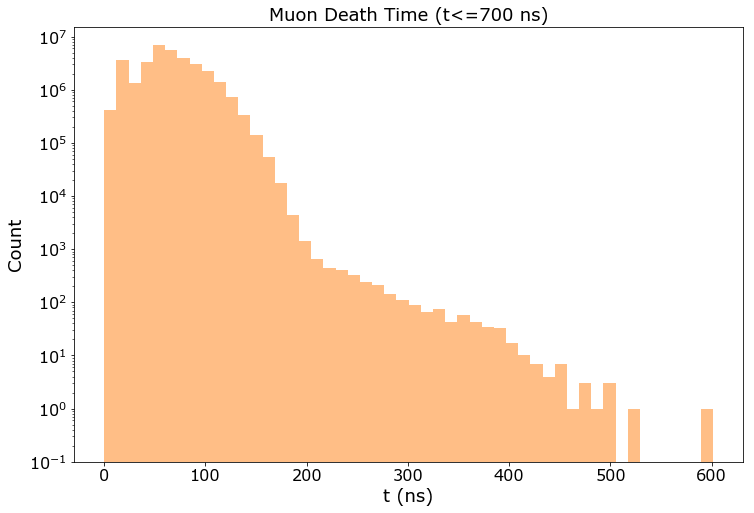

In [18]:
_ = splt.hist(df_ntpart.tstop.values, bins=50, log=True, color='C1')
plt.title('Muon Death Time (t<=700 ns)')
plt.xlabel('t (ns)')
plt.ylabel('Count')

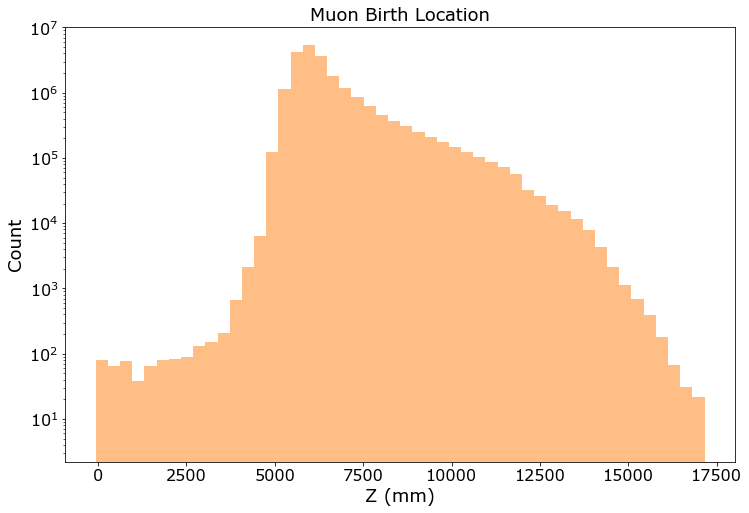

In [43]:
_ = splt.hist(df_mu.z.values, bins=50, log=True, color='C1')
plt.title('Muon Birth Location')
plt.xlabel('Z (mm)')
plt.ylabel('Count')

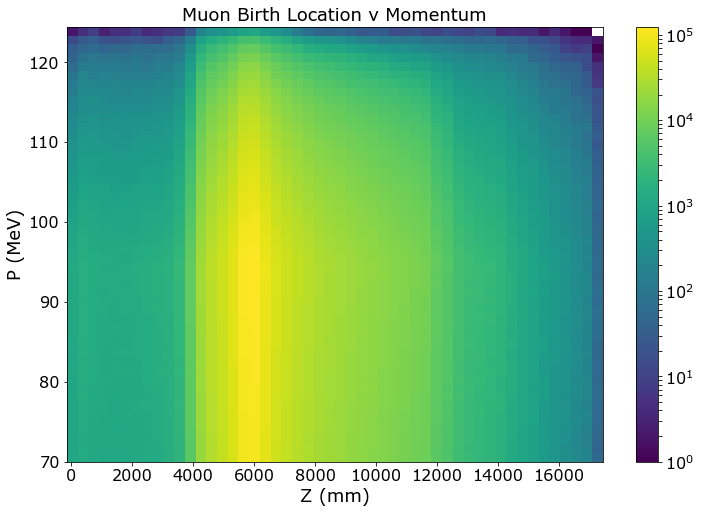

In [19]:
plt.hist2d(df_ntpart.z.values, df_ntpart.p.values, bins=50, norm=LogNorm())
plt.title('Muon Birth Location v Momentum')
plt.xlabel('Z (mm)')
plt.ylabel('P (MeV)')
plt.colorbar()

In [20]:
df_mu_bad = df_ntpart.query('9600<z<13300 and p>75')

In [22]:
df_mu_bad

trk  pdg       time  gtime           x           y  \
run subrun evt                                                         
1   0      68       5   13  62.694576    0.0   83.155518  -32.501244   
           91       7   13  48.783039    0.0  187.958008 -336.332489   
           95       3   13  48.889275    0.0   64.428955  181.851074   
           97       3   13  30.589823    0.0  -72.163330  -45.165436   
           101     10   13  43.883514    0.0 -217.602051   36.098019   
           180      7   13  66.922394    0.0  355.665283  452.708374   
           196     15   13  64.002609    0.0   36.623047 -240.688889   
           320      8   13  49.666878    0.0  118.687744  127.753212   
           366      3   13  46.454487    0.0   77.300781  183.148148   
           383     10   13  64.277359    0.0 -150.009766  132.229614   
           448      3   13  59.561028    0.0 -218.256836 -109.739517   
           473      6   13  78.715286    0.0 -311.617676  223.414612   
           548      3   13  49.269215    0.0   54.896973   99.957481   
           570      3   13  52.186985    0.0  -22.303467   43.657093   
           573      3   13  34.624546    0.0   77.977051  190.863464   
           577      6   13  36.438808    0.0 -225.312500 -527.569946   
           637      6   13  39.697186    0.0   20.976074   33.592834   
           641      3   13  53.695950    0.0   37.261719 -153.661819   
           649      3   13  36.557327    0.0  -73.759277 -332.026154   
           667      3   13  25.332848    0.0  131.459229  238.459412   
           719      5   13  74.982170    0.0    8.612549   87.087448   
           736      3   13  24.098511    0.0  117.955811   93.071388   
           744      3   13  38.286945    0.0  -62.862549    4.263286   
           768      3   13  69.989342    0.0  265.616211 -386.138916   
           781      4   13  38.541008    0.0   23.301758 -376.215759   
           859      9   13  38.734562    0.0 -127.405273 -455.654938   
           867      3   13  38.660374    0.0   98.163818 -158.931473   
           890      3   13  43.067062    0.0  -90.243652  226.921585   
           895      3   13  26.770670    0.0  127.433105  211.388062   
           910      4   13  32.391472    0.0 -185.295654  -44.708599   
...               ...  ...        ...    ...         ...         ...   
    999    99120    9   13  46.721855    0.0 -263.341309 -407.095184   
           99132    3   13  44.912598    0.0 -109.549316 -137.129364   
           99155    3   13  41.120407    0.0  -28.489990 -255.323990   
           99175    5   13  66.085968    0.0 -198.304199 -167.172287   
           99207    3   13  34.919926    0.0  139.284668 -286.668457   
           99228   10   13  55.116158    0.0 -334.827148   66.429192   
           99231    3   13  27.395313    0.0  334.549316  -22.651814   
           99265   12   13  54.476048    0.0  -50.755859 -207.409195   
           99269    3   13  25.187052    0.0  239.002930  351.391266   
           99274    8   13  42.699902    0.0  -30.049072    7.136942   
           99350    5   13  71.140335    0.0  -82.902588 -105.838326   
           99385    7   13  72.812553    0.0   91.297852 -247.068268   
           99401    7   13  68.766083    0.0 -102.014893 -477.371857   
           99443    3   13  42.462929    0.0 -298.883301  -33.165943   
           99464    9   13  70.005569    0.0   81.196289   45.581551   
           99480    3   13  43.300987    0.0  -74.095703  -14.347290   
           99482    3   13  49.122932    0.0  -70.402100 -152.211502   
           99504    8   13  69.366753    0.0 -333.085938   96.995140   
           99510    3   13  44.619915    0.0   54.732910  -49.246384   
           99595    5   13  80.480492    0.0 -320.012695   24.098227   
           99603    3   13  29.881069    0.0  -62.834229  -21.276020   
           99624    4   13  35.142403    0.0 -306.181152   98.967636   
           99761    3   13  42.636219    0.0   75.758057 -

In [29]:
df_mu_bad_narrow = df_mu_bad[(df_mu_bad.pz<10)&(df_mu_bad.pz>-10)]

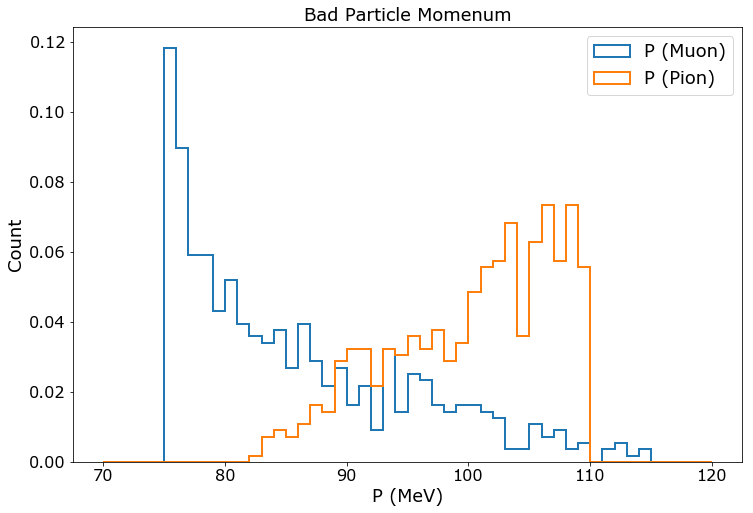

In [38]:
_ = splt.hist(df_mu_bad_narrow.p.values, bins=50, histtype='step', label='P (Muon)', range=(70,120), normed=True)
_ = splt.hist(df_mu_bad_narrow.parent_p.values, bins=50, histtype='step', label='P (Pion)', range=(70,120), normed=True)
plt.title('Bad Particle Momenum')
plt.xlabel('P (MeV)')
plt.ylabel('Count')
plt.legend()

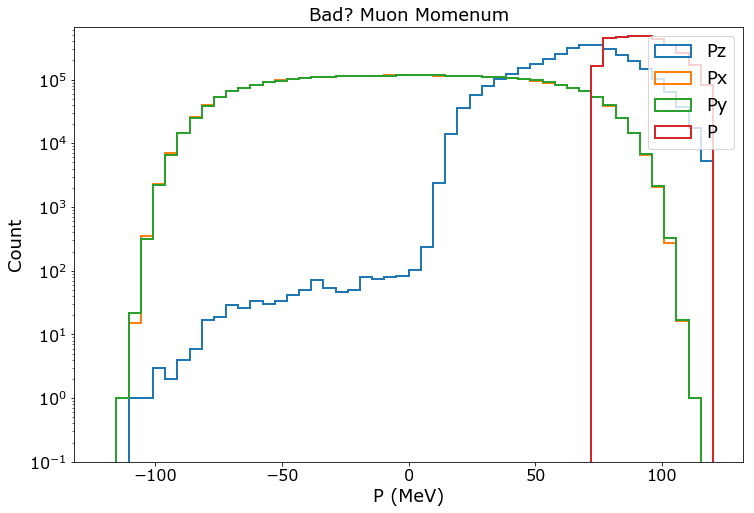

In [28]:
_ = splt.hist(df_mu_bad.pz.values, bins=50, log=True, histtype='step', label='Pz', range=(-120,120))
_ = splt.hist(df_mu_bad.px.values, bins=50, log=True, histtype='step', label='Px', range=(-120,120))
_ = splt.hist(df_mu_bad.py.values, bins=50, log=True, histtype='step', label='Py', range=(-120,120))
_ = splt.hist(df_mu_bad.p.values, bins=50, log=True, histtype='step', label='P', range=(-120,120))
plt.title('Bad? Muon Momenum')
plt.xlabel('P (MeV)')
plt.ylabel('Count')
plt.legend()

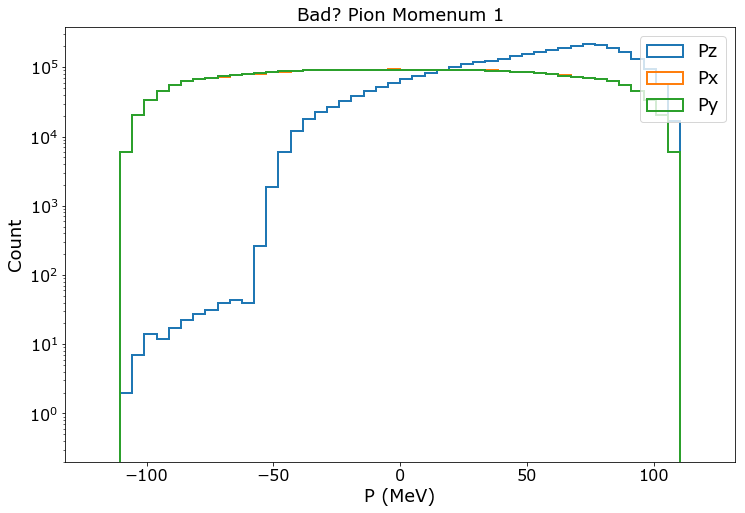

In [24]:
_ = splt.hist(df_mu_bad.parent_pz.values, bins=50, log=True, histtype='step', label='Pz', range=(-120,120))
_ = splt.hist(df_mu_bad.parent_px.values, bins=50, log=True, histtype='step', label='Px', range=(-120,120))
_ = splt.hist(df_mu_bad.parent_py.values, bins=50, log=True, histtype='step', label='Py', range=(-120,120))
plt.title('Bad? Pion Momenum 1')
plt.xlabel('P (MeV)')
plt.ylabel('Count')
plt.legend()

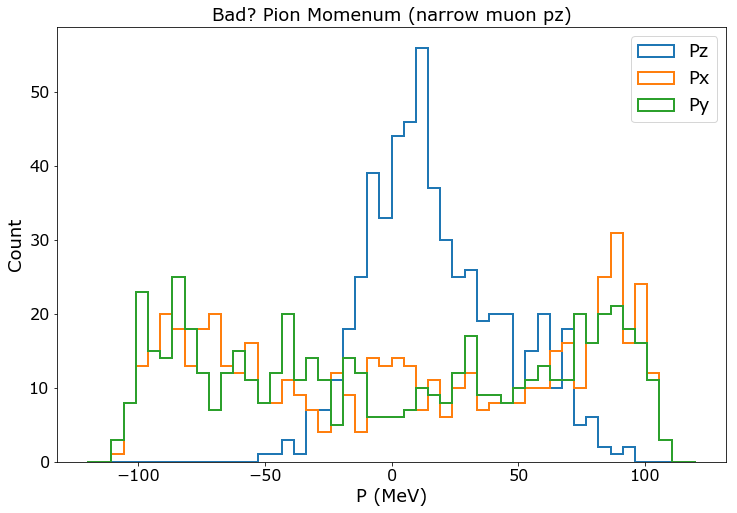

In [40]:
_ = splt.hist(df_mu_bad[(df_mu_bad.pz<10)&(df_mu_bad.pz>-10)].parent_pz.values, bins=50,  histtype='step', label='Pz', range=(-120,120))
_ = splt.hist(df_mu_bad[(df_mu_bad.pz<10)&(df_mu_bad.pz>-10)].parent_px.values, bins=50,  histtype='step', label='Px', range=(-120,120))
_ = splt.hist(df_mu_bad[(df_mu_bad.pz<10)&(df_mu_bad.pz>-10)].parent_py.values, bins=50,  histtype='step', label='Py', range=(-120,120))
#_ = splt.hist(df_mu_bad[(df_mu_bad.pz<10)&(df_mu_bad.pz>-10)].parent_p.values, bins=50, histtype='step', label='P', range=(-120,120))
plt.title('Bad? Pion Momenum (narrow muon pz)')
plt.xlabel('P (MeV)')
plt.ylabel('Count')
plt.legend()

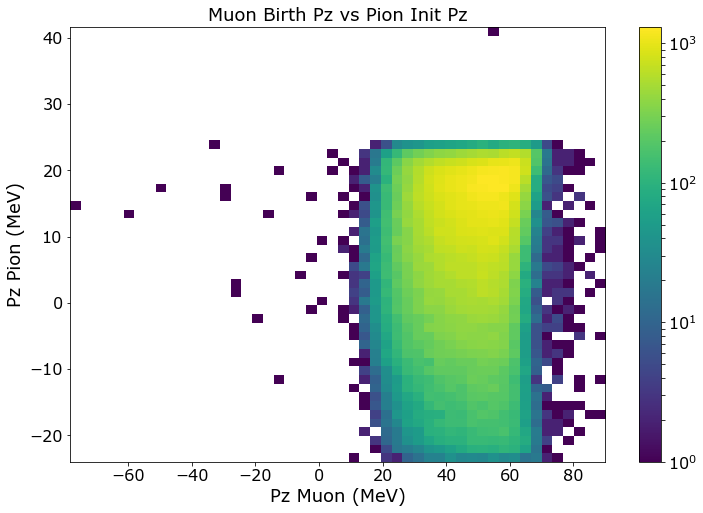

In [51]:
plt.hist2d(df_mu_bad.pz.values, df_mu_bad.parent_pz.values, bins=50, norm=LogNorm())
plt.title('Muon Birth Pz vs Pion Init Pz')
plt.xlabel('Pz Muon (MeV)')
plt.ylabel('Pz Pion (MeV)')
plt.colorbar()

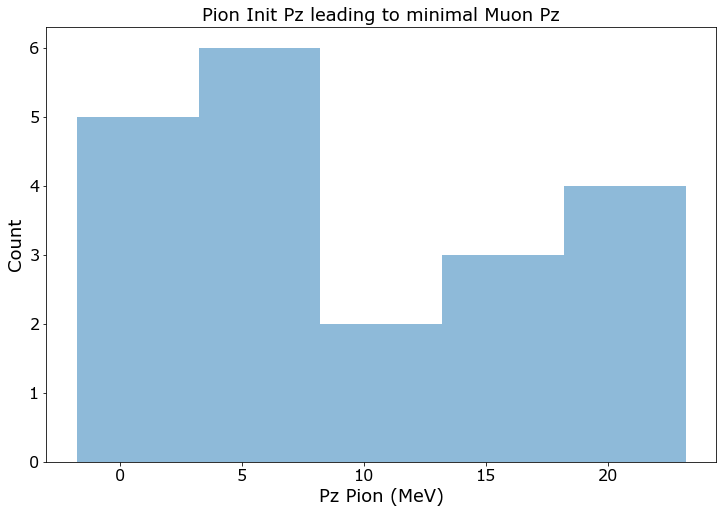

In [18]:
_ = splt.hist(df_mu_bad[(df_mu_bad.pz<10)&(df_mu_bad.pz>-10)].parent_pz.values, bins=5)
plt.title('Pion Init Pz leading to minimal Muon Pz')
plt.xlabel('Pz Pion (MeV)')
plt.ylabel('Count')

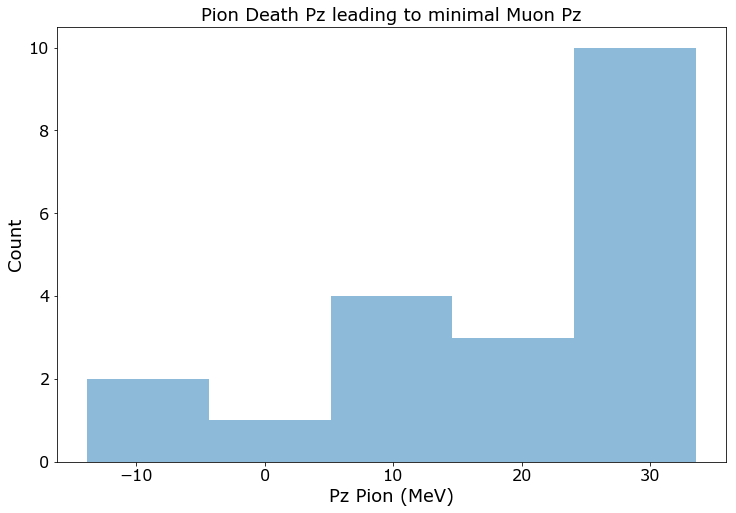

In [17]:
_ = splt.hist(df_mu_bad[(df_mu_bad.pz<10)&(df_mu_bad.pz>-10)].parent_pzstop.values, bins=5)
plt.title('Pion Death Pz leading to minimal Muon Pz')
plt.xlabel('Pz Pion (MeV)')
plt.ylabel('Count')

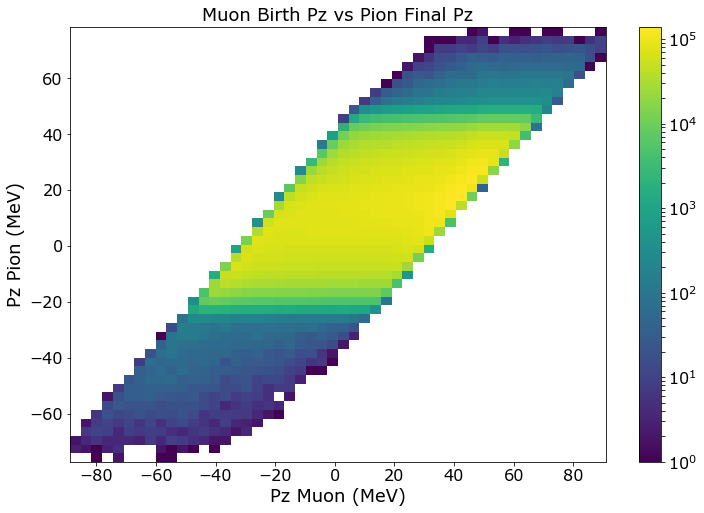

In [21]:
plt.hist2d(df_mu.pz.values, df_mu.parent_pzstop.values, bins=50, norm=LogNorm())
plt.title('Muon Birth Pz vs Pion Final Pz')
plt.xlabel('Pz Muon (MeV)')
plt.ylabel('Pz Pion (MeV)')
plt.colorbar()

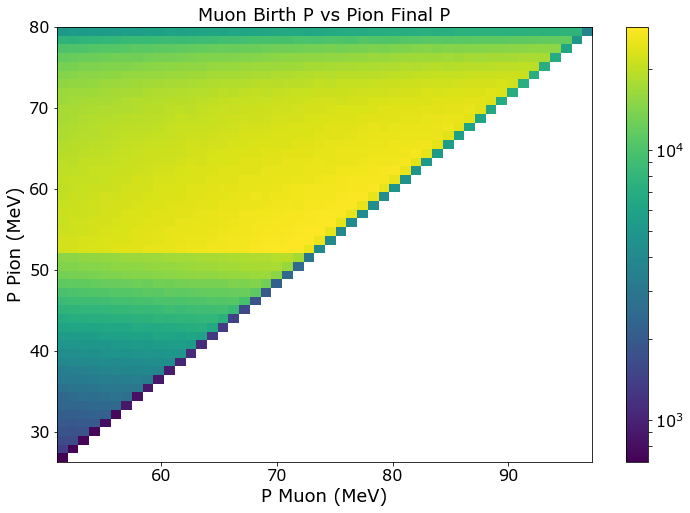

In [22]:
plt.hist2d(df_mu.p.values, df_mu.parent_pstop.values, bins=50, norm=LogNorm())
plt.title('Muon Birth P vs Pion Final P')
plt.xlabel('P Muon (MeV)')
plt.ylabel('P Pion (MeV)')
plt.colorbar()

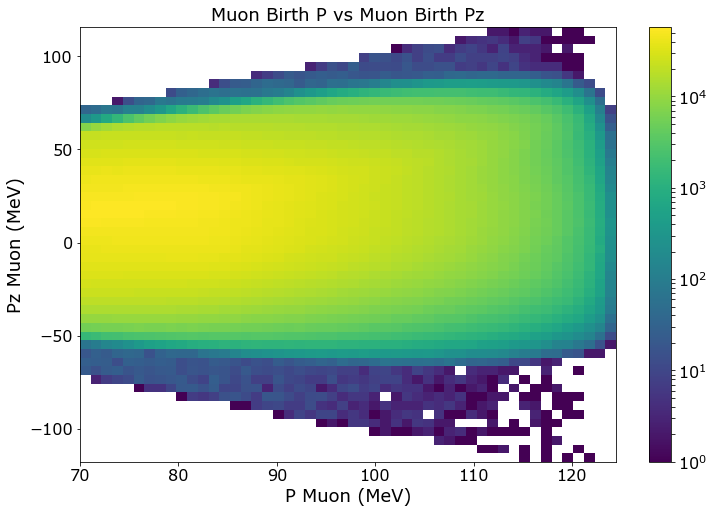

In [21]:
plt.hist2d(df_ntpart.p.values, df_ntpart.pz.values, bins=50, norm=LogNorm())
plt.title('Muon Birth P vs Muon Birth Pz')
plt.xlabel('P Muon (MeV)')
plt.ylabel('Pz Muon (MeV)')
plt.colorbar()

In [10]:
df_mu_bad = df_ntpart.query('tstop>600')

In [17]:
df_mu_bad['pr'] = df_mu_bad['px']*np.cos(np.arctan2(df_mu_bad['y'], df_mu_bad['x']))+df_mu_bad['py']*np.sin(np.arctan2(df_mu_bad['y'], df_mu_bad['x']))
df_mu_bad['prstop'] = df_mu_bad['pxstop']*np.cos(np.arctan2(df_mu_bad['ystop'], df_mu_bad['xstop']))+df_mu_bad['pystop']*np.sin(np.arctan2(df_mu_bad['ystop'], df_mu_bad['xstop']))
df_mu_bad['parent_pr'] = df_mu_bad['parent_px']*np.cos(np.arctan2(df_mu_bad['parent_y'], df_mu_bad['parent_x']))+df_mu_bad['parent_py']*np.sin(np.arctan2(df_mu_bad['parent_y'], df_mu_bad['parent_x']))
df_mu_bad['parent_prstop'] = df_mu_bad['parent_pxstop']*np.cos(np.arctan2(df_mu_bad['y'], df_mu_bad['x']))+df_mu_bad['parent_pystop']*np.sin(np.arctan2(df_mu_bad['y'], df_mu_bad['x']))


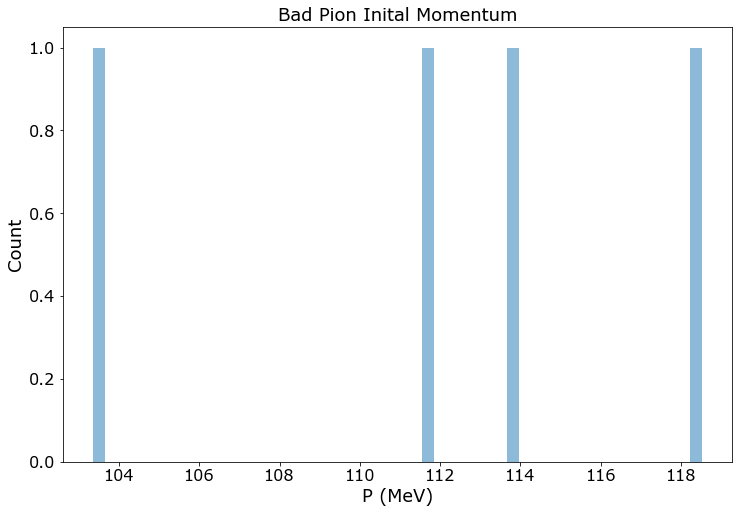

In [21]:
_ = splt.hist(df_mu_bad.parent_p.values, bins=50)
plt.title('Bad Pion Inital Momentum')
plt.xlabel('P (MeV)')
plt.ylabel('Count')
plt.show()

_ = splt.hist(df_mu_bad.parent_pz.values, bins=50, histtype='step', label='Pz', range=(-120,120))
_ = splt.hist(df_mu_bad.parent_pr.values, bins=50, histtype='step', label='Pr', range=(-120,120))
plt.title('Bad Pion Initial Momenum')
plt.xlabel('P (MeV)')
plt.ylabel('Count')
plt.legend()
plt.show()

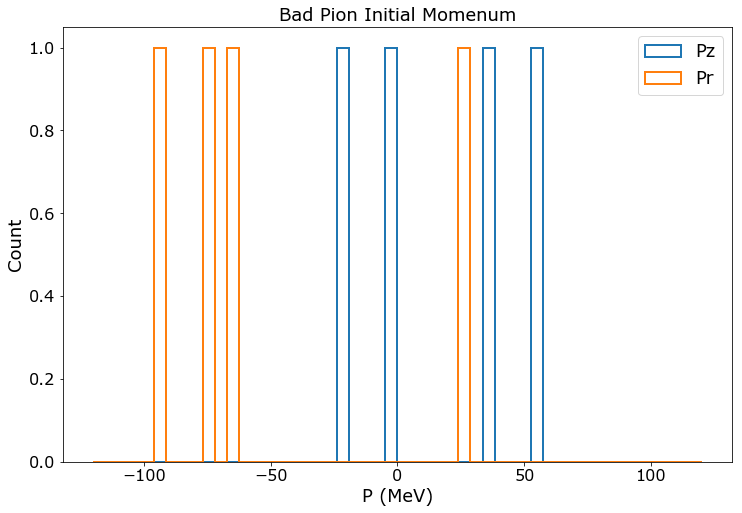

In [23]:
_ = splt.hist(df_mu_bad.parent_pz.values, bins=50, histtype='step', label='Pz', range=(-120,120))
_ = splt.hist(df_mu_bad.parent_pr.values, bins=50, histtype='step', label='Pr', range=(-120,120))
plt.title('Bad Pion Initial Momenum')
plt.xlabel('P (MeV)')
plt.ylabel('Count')
plt.legend()

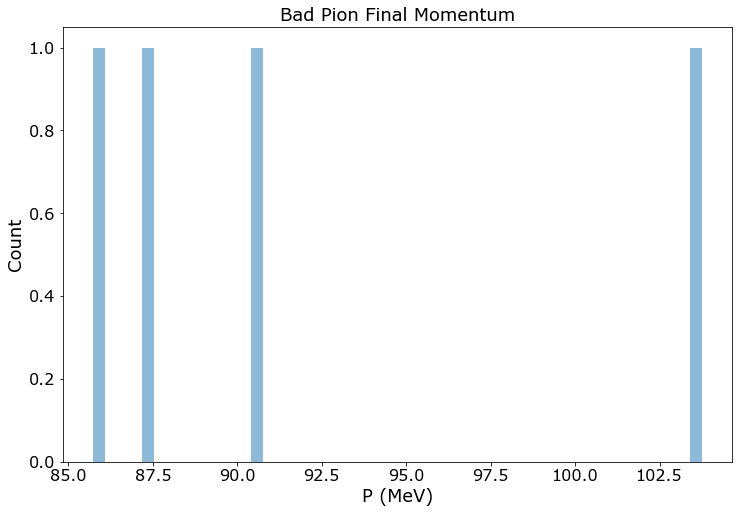

In [24]:
_ = splt.hist(df_mu_bad.parent_pstop.values, bins=50)
plt.title('Bad Pion Final Momentum')
plt.xlabel('P (MeV)')
plt.ylabel('Count')

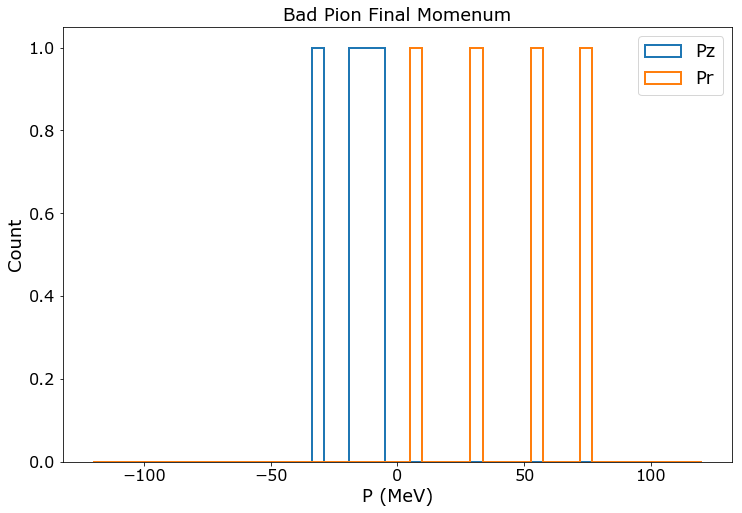

In [25]:
_ = splt.hist(df_mu_bad.parent_pzstop.values, bins=50, histtype='step', label='Pz', range=(-120,120))
_ = splt.hist(df_mu_bad.parent_prstop.values, bins=50, histtype='step', label='Pr', range=(-120,120))
plt.title('Bad Pion Final Momenum')
plt.xlabel('P (MeV)')
plt.ylabel('Count')
plt.legend()

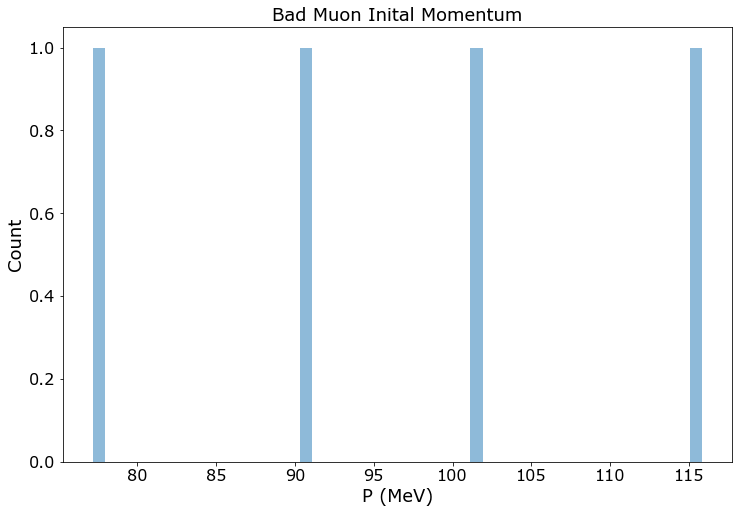

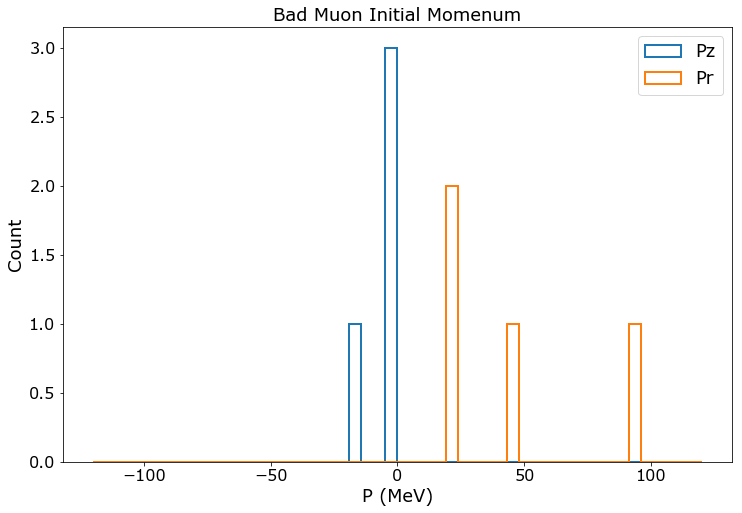

In [26]:
_ = splt.hist(df_mu_bad.p.values, bins=50)
plt.title('Bad Muon Inital Momentum')
plt.xlabel('P (MeV)')
plt.ylabel('Count')
plt.show()

plt.figure()
_ = splt.hist(df_mu_bad.pz.values, bins=50, histtype='step', label='Pz', range=(-120,120))
_ = splt.hist(df_mu_bad.pr.values, bins=50, histtype='step', label='Pr', range=(-120,120))
plt.title('Bad Muon Initial Momenum')
plt.xlabel('P (MeV)')
plt.ylabel('Count')
plt.legend()
plt.show()

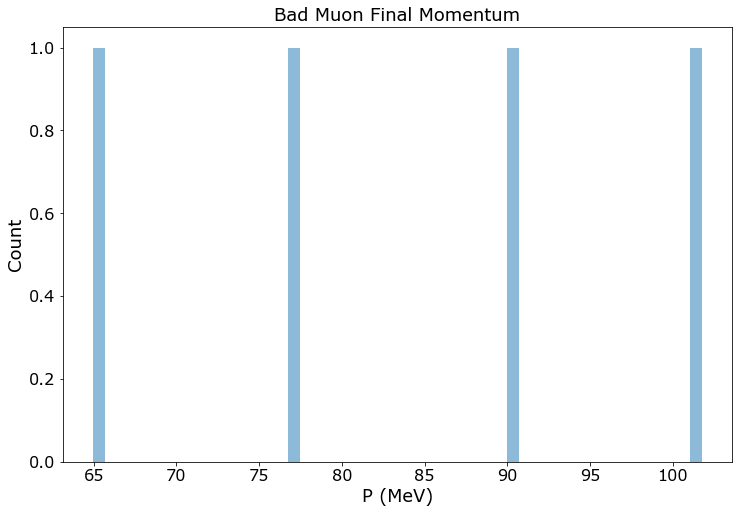

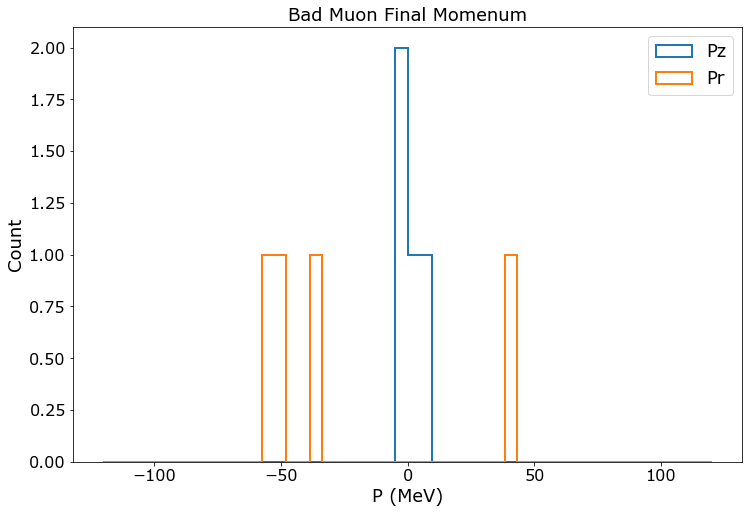

In [27]:
_ = splt.hist(df_mu_bad.pstop.values, bins=50)
plt.title('Bad Muon Final Momentum')
plt.xlabel('P (MeV)')
plt.ylabel('Count')
plt.show()

plt.figure()
_ = splt.hist(df_mu_bad.pzstop.values, bins=50, histtype='step', label='Pz', range=(-120,120))
_ = splt.hist(df_mu_bad.prstop.values, bins=50, histtype='step', label='Pr', range=(-120,120))
plt.title('Bad Muon Final Momenum')
plt.xlabel('P (MeV)')
plt.ylabel('Count')
plt.legend()
plt.show()

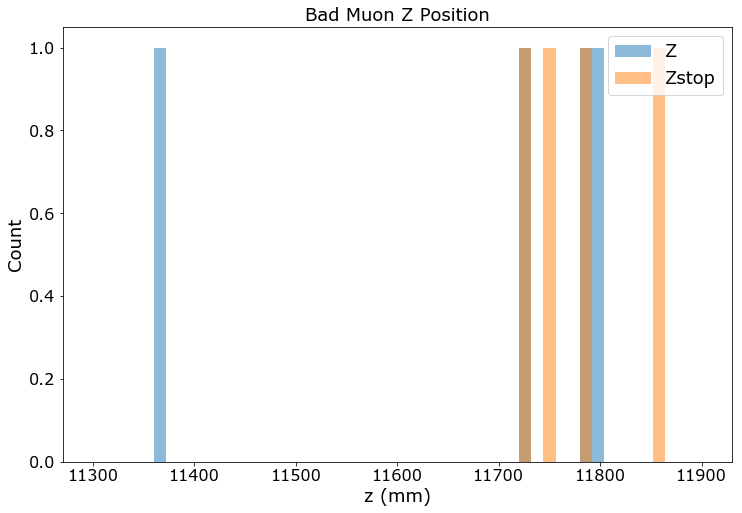

In [37]:
_ = splt.hist(df_mu_bad.z.values, bins=50, histtype='stepfilled', label='Z', range=(11300,11900))
_ = splt.hist(df_mu_bad.zstop.values, bins=50, histtype='stepfilled', label='Zstop', range=(11300,11900))
plt.title('Bad Muon Z Position')
plt.xlabel('z (mm)')
plt.ylabel('Count')
plt.legend()
plt.show()

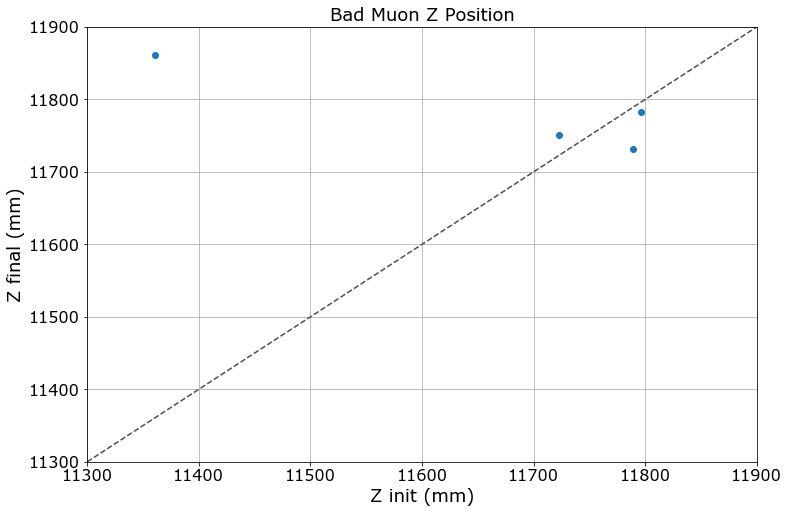

In [44]:
_ = plt.plot(df_mu_bad.z.values, df_mu_bad.zstop.values, 'o')
plt.xlim(11300, 11900)
plt.ylim(11300, 11900)
plt.title('Bad Muon Z Position')
plt.xlabel('Z init (mm)')
plt.ylabel('Z final (mm)')
ax = plt.gca()
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
plt.grid()
plt.legend()
plt.show()

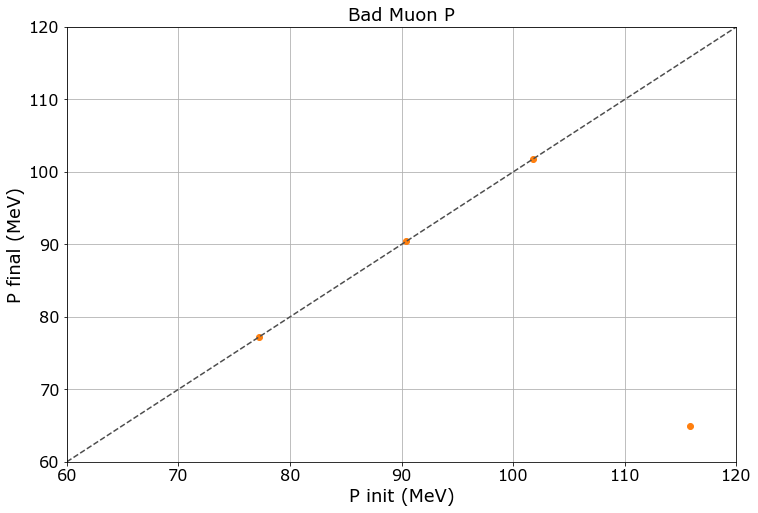

In [46]:
_ = plt.plot(df_mu_bad.p.values, df_mu_bad.pstop.values, 'oC1')
plt.title('Bad Muon P')
plt.xlabel('P init (MeV)')
plt.ylabel('P final (MeV)')
plt.xlim(60,120)
plt.ylim(60,120)
ax = plt.gca()
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
plt.grid()
plt.legend()
plt.show()

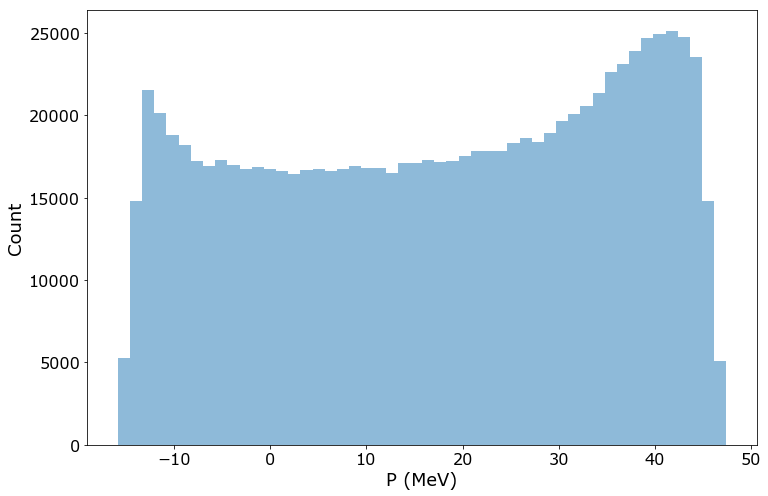

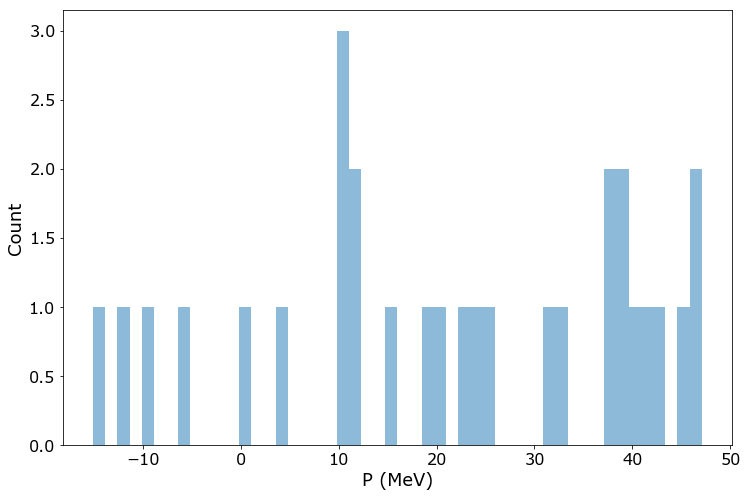

In [61]:
_ = splt.hist(df_ntpart[(df_ntpart.parent_pzstop>18)&(df_ntpart.parent_pzstop<22)&(df_ntpart.parent_pstop>100)].pz.values, bins=50)
plt.title('')
plt.xlabel('P (MeV)')
plt.ylabel('Count')
plt.show()

plt.figure()
_ = splt.hist(df_ntpart[(df_ntpart.parent_pzstop>18)&(df_ntpart.parent_pzstop<22)&(df_ntpart.parent_pstop>100)&(df_ntpart.z>11300)&(df_ntpart.z<11900)].pz.values, bins=50)
plt.title('')
plt.xlabel('P (MeV)')
plt.ylabel('Count')
plt.show()


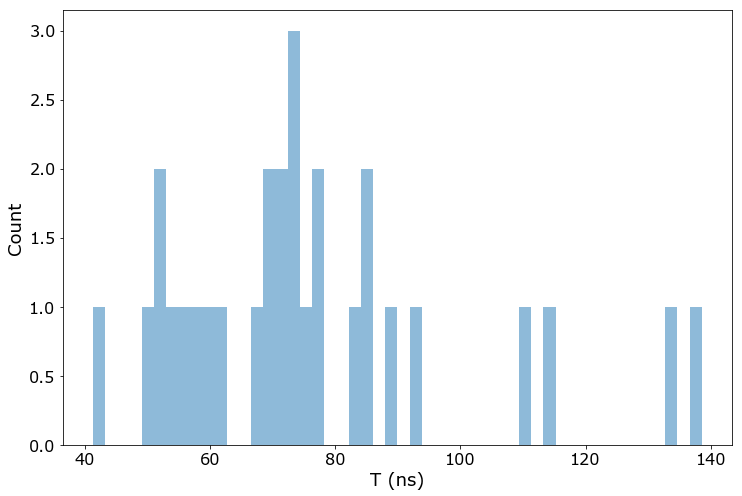

In [63]:
_ = splt.hist(df_ntpart[(df_ntpart.parent_pzstop>18)&(df_ntpart.parent_pzstop<22)&(df_ntpart.parent_pstop>100)&(df_ntpart.z>11300)&(df_ntpart.z<11900)].time.values, bins=50)
plt.title('')
plt.xlabel('T (ns)')
plt.ylabel('Count')
plt.show()

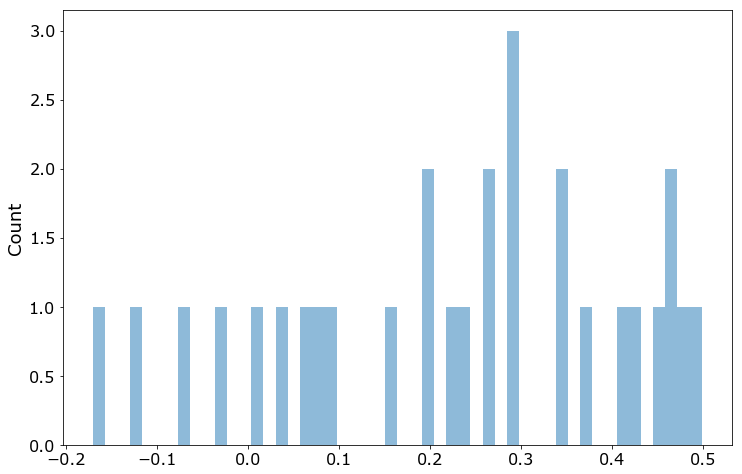

In [68]:
df_tmp = df_ntpart[(df_ntpart.parent_pzstop>18)&(df_ntpart.parent_pzstop<22)&(df_ntpart.parent_pstop>100)&(df_ntpart.z>11300)&(df_ntpart.z<11900)]
_ = splt.hist(df_tmp.parent_pz.values/df_tmp.parent_p.values, bins=50)
plt.title('')
plt.xlabel('')
plt.ylabel('Count')
plt.show()